## Load the Data

1.Dataset Description

The dataset used in this study provides a comprehensive view of FinTech companies, focusing on their intellectual property, investment in IT capabilities, user engagement and market performance indicators. It includes information on patents, trademarks, and CB (Crunchbase) rank, which are critical factors for understanding innovation and competitiveness within the FinTech industry. These variables allow for an in-depth exploration of how intellectual property investments and other attributes influence a company's market position and success.

**Outcome Variable**
1) CB Rank: Crunchbase rank is a metric that evaluates a company’s overall standing based on its popularity, funding, and other performance indicators. A lower CB rank (e.g., rank 1) signifies a higher-performing company. This metric is used as the dependent variable in the analysis, reflecting a company’s market position.

**Independent/Explanatory Features:**

1) Patents: This variable represents the number of patents granted to each company. Patents are a direct measure of innovation and technological advancements, providing legal protection for unique inventions and processes. In this study, we use patent data to understand how innovation correlates with a company's CB rank.

2) Trademarks: This variable reflects the number of trademarks registered by each company. Trademarks are essential for establishing a company’s brand identity and protecting intellectual property associated with branding. The analysis will explore whether a stronger brand presence, as indicated by trademarks, impacts market competitiveness.

3) BuiltWith...Active.Tech.Count: Total number of technologies currently in use by this company, refelcting current technologies company uses. This variable was chosen over IT investment as it provide us with a greater understanding of the number of technologies that are currently being used. Technology count shows actual implementation rather than just financial commitment. Additionally, it was later discovered that most of the values of Investment in IT are null (more than 90%).

4) SimilarWeb...Monthly.Visits.Growth: Monthly visit growth rate, reflecting user engagement.

5) SimilarWeb...Visit.Duration: Average time spent on the platform by users.

**Control Variables:**

1) Age of the Company: The number of years since the company’s establishment, used to assess whether older companies perform differently compared to newer ones.

2) Number of Employees: A measure of company size, reflecting operational scale and resources.

3) Estimated Revenue: Approximate revenue ranges to gauge financial performance and market reach.

4) Industry 

**Research Overview:**

This study aims to evaluate the factors influencing the performance of FinTech companies as measured by their CB rank, a critical indicator of market competitiveness and innovation. The research focuses on testing the following three hypotheses within a unified regression model:

1. **Hypothesis 1**: FinTech companies that invest more in their technology capabilities have a better CB rank than those who barely invest on their technological internal resources.

Measured by number of technologies company currently uses and investment in IT.

2. **Hypothesis 2**: Companies that have higher monthly visit growth and longer visit durations tend to have better CB Rank. 

This hypothesis is measured by monthly visit growth and average time spent on the platform

3. **Hypothesis 3**: Companies with greater investment in intellectual property (IP) are associated with higher CB ranks.

Reflected by the number of patents and trademarks 

By integrating these three hypotheses into a single regression model, this analysis provides a comprehensive evaluation of how differentiation, user engagement, and intellectual property investments collectively impact a company's market performance. The results will offer actionable insights for FinTech stakeholders, including investors, policymakers, and company executives, enabling them to optimize strategies for innovation, branding, and user retention.

The dataset used for this study includes a wide range of variables related to FinTech companies' market presence, intellectual property, user engagement, and differentiation. Through this analysis, the research aims to validate the hypotheses and assess the relative importance of these factors in determining CB rank.

In [1]:
import pandas as pd

# Specify the file path
file_path = "D:/JADS/MasterS1/SBM/Group_Assignment/Data/Crunchbase/Fintech/FinTechCompanies.csv"


# Load the CSV file
data = pd.read_csv(file_path)

C:\Users\raina\AppData\Local\Temp\ipykernel_10636\1066666284.py:8: DtypeWarning: Columns (39,47,111,119) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [2]:
# Printing all the columns to check which columns are needed
columns_list = data.columns.tolist()
for column in columns_list:
    print(column)

Organization Name
Organization Name URL
CB Rank (Organization)
Industries
Founded Date
Year
Year.1
Age
Founded Date Precision
Estimated Revenue Range
Exit Date
Exit Date Precision
Closed Date
Closed Date Precision
Hub Tags
Full Description
Industry Groups
Funding Status
Total Funding Amount
Total Funding Amount Currency
Total Funding Amount Currency (in USD)
Top 5 Investors
Acquired by
Acquired by URL
Announced Date
Announced Date Precision
Operating Status
Headquarters Location
Company Type
Website
Number of Employees
Acquisition Status
Headquarters Regions
Description
Twitter
Facebook
LinkedIn
Contact Email
Phone Number
Number of Articles
Investor Type
Investment Stage
Accelerator Program Type
Accelerator Application Deadline
Accelerator Duration (in weeks)
School Type
School Program
Number of Enrollments
School Method
Number of Founders (Alumni)
Number of Alumni
Founders
Number of Founders
Number of Funding Rounds
Last Funding Date
Last Funding Amount
Last Funding Amount Currency
La

### Select key variables in the dataset.

In [3]:
# Define the columns you want to use for your regression model
selected_columns = [
    "CB Rank (Organization)",                # Dependent variable (CB Rank)
    "BuiltWith - Active Tech Count",         # Hypothesis 1: Active Tech Count
    "SimilarWeb - Monthly Visits Growth",    # Hypothesis 2: Monthly Visits Growth
    "SimilarWeb - Visit Duration",           # Hypothesis 2: Visit Duration
    "IPqwery - Patents Granted",             # Hypothesis 3: Patents
    "IPqwery - Trademarks Registered",       # Hypothesis 3: Trademarks
    "Age",                                   # Control Variable: Age of the Company
    "Number of Employees",                   # Control Variable: Number of Employees
    "Estimated Revenue Range",               # Control Variable: Estimated Revenue
    "Industries"                             # Control Variable: Industry Type
]

# Create a new DataFrame with the corrected selected columns
selected_data = data[selected_columns]

# Display the first few rows of the selected data to confirm
selected_data.head()

,CB Rank (Organization),BuiltWith - Active Tech Count,SimilarWeb - Monthly Visits Growth,SimilarWeb - Visit Duration,IPqwery - Patents Granted,IPqwery - Trademarks Registered,Age,Number of Employees,Estimated Revenue Range,Industries
0,4,97.0,-48.83%,"1,275",NaN,NaN,4,Nov-50,$1M to $10M,"Developer APIs, FinTech, Payments, Software"
1,5,34.0,1.64%,150,0,2.0,4,51-100,Less than $1M,"Banking, E-Commerce, Financial Services, FinTe..."
2,12,42.0,-9.50%,57,NaN,NaN,6,101-250,$10M to $50M,"Financial Services, FinTech, Marketplace, Real..."
3,13,34.0,6.55%,290,724,49.0,11,1001-5000,$1B to $10B,"Finance, FinTech, Hardware, Mobile, Mobile Pay..."
4,17,32.0,-60.72%,"1,391",0,1.0,7,Nov-50,$1M to $10M,"Financial Services, FinTech, Mobile, Mobile Pa..."


In [4]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13394 entries, 0 to 13393
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CB Rank (Organization)              13394 non-null  object 
 1   BuiltWith - Active Tech Count       12359 non-null  float64
 2   SimilarWeb - Monthly Visits Growth  8403 non-null   object 
 3   SimilarWeb - Visit Duration         7069 non-null   object 
 4   IPqwery - Patents Granted           2392 non-null   object 
 5   IPqwery - Trademarks Registered     2392 non-null   float64
 6   Age                                 13394 non-null  object 
 7   Number of Employees                 11461 non-null  object 
 8   Estimated Revenue Range             5416 non-null   object 
 9   Industries                          13394 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.0+ MB


The output from selected_data.info() reveals that our dataset contains both numerical and non-numerical (string/object) data types across different columns. To proceed with regression analysis, it would be necessary to transform the object-type variables into suitable numerical representations.

## Data Cleaning and Transformation

In [5]:
selected_data.isna().sum()

CB Rank (Organization)                    0
BuiltWith - Active Tech Count          1035
SimilarWeb - Monthly Visits Growth     4991
SimilarWeb - Visit Duration            6325
IPqwery - Patents Granted             11002
IPqwery - Trademarks Registered       11002
Age                                       0
Number of Employees                    1933
Estimated Revenue Range                7978
Industries                                0
dtype: int64

1. **Dependent Variable (`CB Rank (Organization)`):**
   - Drop rows with missing values because the dependent variable is critical for regression analysis.

2. **IT Metrics (`BuiltWith - Active Tech Count`):**
   - Use the mean to fill missing values as these are numeric metrics where average performance is meaningful.

3. **User Engagement Metrics (`SimilarWeb - Monthly Visits Growth`, `SimilarWeb - Visit Duration`):**
   - Use the median to handle outliers, as these values can be skewed by extreme behaviors.

4. **Intellectual Property Metrics (`IPqwery - Patents Granted`, `IPqwery - Trademarks Registered`):**
   - Use 0 as missing values may imply no patents or trademarks for the company.

5. **Control Variables:**
   - **Age**: No missing values, no action needed.
   - **Number of Employees**: Use the mean because it reflects average operational scale.
   - **Estimated Revenue Range**: Use the mode because it’s a categorical variable with ordinal ranking.

Based on output, here are the key observations and the steps we should take to preprocess the data:

1. **Non-Numeric Columns:**
   - Some columns, like `SimilarWeb - Monthly Visits Growth`, `SimilarWeb - Visit Duration`, `Estimated Revenue Range`, and `Industries`, are non-numeric (`object` type). These need to be transformed into numeric or encoded formats to be used in regression models.

2. **Missing Values:**
   - Certain columns, such as `G2 Stack - Total Products Active` and `IPqwery - Patents Granted`, have significant missing values.
   - Handling missing values appropriately for these variables is critical to maintain data integrity.

3. **Data Distribution:**
   - Some columns (e.g., `IPqwery - Trademarks Registered`) have a large range, including many zeros. These zeros could indicate no trademarks or missing data; you might need to verify their meaning.

4. **High Cardinality in Categorical Columns:**
   - Columns like `Industries` may have many unique values, requiring encoding techniques like one-hot encoding or frequency encoding.


### Data Cleaning

In [6]:
clean_data = selected_data.copy()

#### Step 1. **Convert Non-Numeric Columns:**
   - **`SimilarWeb - Monthly Visits Growth` and `SimilarWeb - Visit Duration`:**
     - These should be converted to numeric if they represent numerical data stored as strings. Use:

In [7]:
clean_data['SimilarWeb - Monthly Visits Growth'] = (clean_data['SimilarWeb - Monthly Visits Growth']
                                                    .replace('[%,]', '', regex=True) # Remove percent signs and commas
                                                    .astype(float) # Convert to floating point numbers
                                                    .div(100) # Divide by 100 to convert to actual values
)

In [8]:
# Convert the column to numeric type along with other columns that need to be turned into numeric
clean_data['Age'] = pd.to_numeric(clean_data['Age'],errors='coerce')

clean_data['SimilarWeb - Visit Duration'] = pd.to_numeric(clean_data['SimilarWeb - Visit Duration'],errors='coerce')

clean_data['IPqwery - Patents Granted'] = pd.to_numeric(clean_data['IPqwery - Patents Granted'],errors='coerce')

In [9]:
#Check if the conversion was successful
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13394 entries, 0 to 13393
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CB Rank (Organization)              13394 non-null  object 
 1   BuiltWith - Active Tech Count       12359 non-null  float64
 2   SimilarWeb - Monthly Visits Growth  8403 non-null   float64
 3   SimilarWeb - Visit Duration         6501 non-null   float64
 4   IPqwery - Patents Granted           2388 non-null   float64
 5   IPqwery - Trademarks Registered     2392 non-null   float64
 6   Age                                 13364 non-null  float64
 7   Number of Employees                 11461 non-null  object 
 8   Estimated Revenue Range             5416 non-null   object 
 9   Industries                          13394 non-null  object 
dtypes: float64(6), object(4)
memory usage: 1.0+ MB


   - **`Estimated Revenue Range`:**
     - This appears to be an ordinal categorical variable. Map it to numeric values based on its range:

In [10]:
revenue_mapping = {
    "Less than $1M": 1,
    "$1M to $10M": 2,
    "$10M to $50M": 3,
    "$50M to $100M": 4,
    "$100M to $500M": 5,
    "$500M to $1B": 6,
    "$1B to $10B": 7,
    "More than $10B": 8
}
clean_data["Estimated Revenue Range"] = clean_data["Estimated Revenue Range"].map(revenue_mapping)

   - **`Estimated Employee Range`:**
     - This appears to be an ordinal categorical variable. Map it to numeric values based on its range:

In [11]:
employee_mapping = {
    "Nov-50": 1,
    "51-100": 2,
    "101-250": 3,
    "251-500": 4,
    "501-1000": 5,
    "1001-5000": 6,
    "5001-10000": 7,
    "10001+": 8
}
clean_data["Number of Employees"] = clean_data["Number of Employees"].map(employee_mapping)

In [12]:
#check if the conversion was successful
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13394 entries, 0 to 13393
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CB Rank (Organization)              13394 non-null  object 
 1   BuiltWith - Active Tech Count       12359 non-null  float64
 2   SimilarWeb - Monthly Visits Growth  8403 non-null   float64
 3   SimilarWeb - Visit Duration         6501 non-null   float64
 4   IPqwery - Patents Granted           2388 non-null   float64
 5   IPqwery - Trademarks Registered     2392 non-null   float64
 6   Age                                 13364 non-null  float64
 7   Number of Employees                 6284 non-null   float64
 8   Estimated Revenue Range             5409 non-null   float64
 9   Industries                          13394 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.0+ MB


   - **`Industries`:**
     - For categorical columns like `Industries`, consider encoding them. If the number of unique values is manageable, use one-hot encoding:
     - **One-Hot Encoding with Splitting**
we split the values in the `Industries` column by commas, then create one-hot encoded columns for all unique industry types. This will ensure each unique industry gets its own column, and rows will have `1` if the corresponding industry is present.

In [13]:
# Split the Industries column into multiple rows, then one-hot encode
from sklearn.preprocessing import MultiLabelBinarizer

# Split the column values into lists
clean_data['Industries_split'] = clean_data['Industries'].str.split(', ')

# Use MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer()
industries_encoded = pd.DataFrame(mlb.fit_transform(clean_data['Industries_split']),
                                  columns=mlb.classes_,
                                  index=clean_data.index)

# Merge the encoded data back into the main DataFrame
clean_data = pd.concat([clean_data.drop(columns=['Industries', 'Industries_split']), industries_encoded], axis=1)

In [14]:
clean_data.head()

,CB Rank (Organization),BuiltWith - Active Tech Count,SimilarWeb - Monthly Visits Growth,SimilarWeb - Visit Duration,IPqwery - Patents Granted,IPqwery - Trademarks Registered,Age,Number of Employees,Estimated Revenue Range,3D Printing,...,Web Hosting,Wellness,Wholesale,Windows Phone,Wine And Spirits,Wireless,Women's,eSports,iOS,mHealth
0,4,97.0,-0.4883,NaN,NaN,NaN,4.0,1.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,34.0,0.0164,150.0,0.0,2.0,4.0,2.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,42.0,-0.0950,57.0,NaN,NaN,6.0,3.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,34.0,0.0655,290.0,724.0,49.0,11.0,6.0,7.0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,32.0,-0.6072,NaN,0.0,1.0,7.0,1.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0


#### Step 2. **Handle Missing Values:**


In [15]:
# Check for missing values
print(clean_data.isnull().sum())

CB Rank (Organization)                    0
BuiltWith - Active Tech Count          1035
SimilarWeb - Monthly Visits Growth     4991
SimilarWeb - Visit Duration            6893
IPqwery - Patents Granted             11006
                                      ...  
Wireless                                  0
Women's                                   0
eSports                                   0
iOS                                       0
mHealth                                   0
Length: 519, dtype: int64


   - For columns with significant missing values, such as `BuiltWith - Active Tech Count` and `SimilarWeb - Visit Duration`, impute missing values:

In [16]:
clean_data["Estimated Revenue Range"] = clean_data["Estimated Revenue Range"].fillna(clean_data["Estimated Revenue Range"].mean())
clean_data["BuiltWith - Active Tech Count"] = clean_data["BuiltWith - Active Tech Count"].fillna(clean_data["BuiltWith - Active Tech Count"].median())
clean_data["SimilarWeb - Visit Duration"] = clean_data["SimilarWeb - Visit Duration"].fillna(clean_data["SimilarWeb - Visit Duration"].median())
clean_data["SimilarWeb - Monthly Visits Growth"] = clean_data["SimilarWeb - Monthly Visits Growth"].fillna(clean_data["SimilarWeb - Monthly Visits Growth"].mean())

   - For columns with many zeros (e.g., `IPqwery - Patents Granted`, `IPqwery - Trademarks Registered`), interpret zeros as a meaningful value if applicable. Otherwise, fill missing values:

In [17]:
clean_data["IPqwery - Patents Granted"].fillna(0, inplace=True)
clean_data["IPqwery - Trademarks Registered"].fillna(0, inplace=True)

In [18]:
clean_data["IPqwery - Patents Granted"] = pd.to_numeric(clean_data["IPqwery - Patents Granted"], errors='coerce')

# EDA

### 1. View basic information of the data

In [19]:
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13394 entries, 0 to 13393
Columns: 519 entries, CB Rank (Organization) to mHealth
dtypes: float64(8), int32(510), object(1)
memory usage: 27.0+ MB
None


### 2. Analyze the distribution of numerical variables
- Goal: Check the statistical characteristics of numerical columns (mean, variance, maximum, minimum, etc.) and whether there are outliers or skewed distributions.
 - Draw a histogram to view the distribution.
 - Draw a box plot to detect outliers.

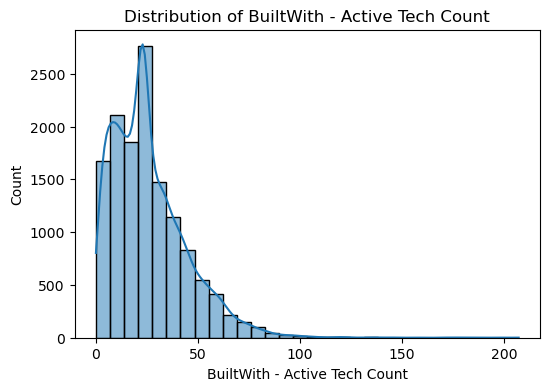

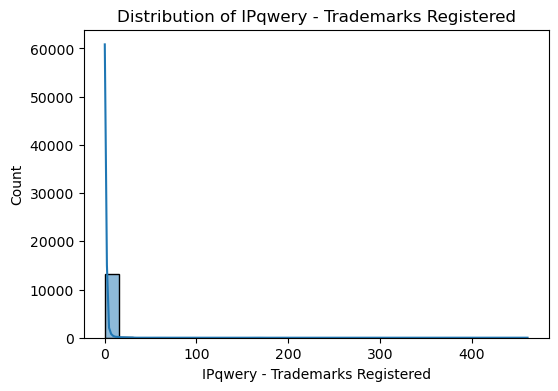

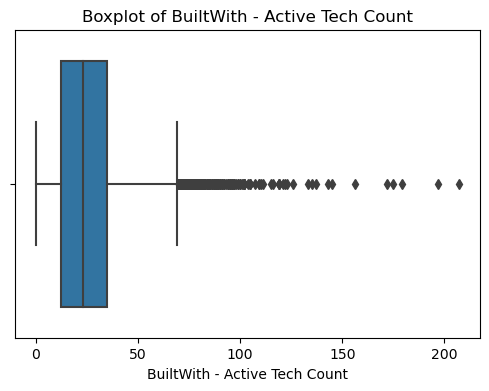

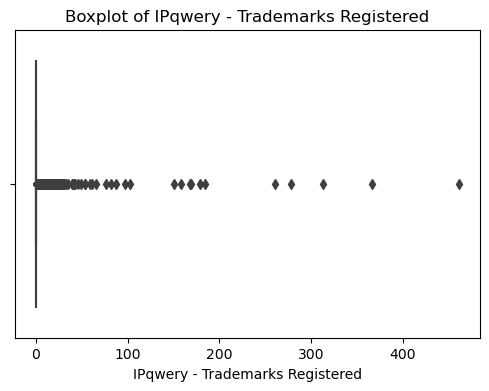

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = selected_data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(clean_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=clean_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


From the visualizations you provided:

#### Key Observations from the Histograms:
1. **BuiltWith - Active Tech Count**:
   - The data is heavily skewed to the right, with most values concentrated below 50.
   - There are noticeable outliers beyond 150.

2. **IPqwery - Trademarks Registered**:
   - The majority of values are near zero, with very few records having trademarks above 50.
   - This extreme right skew suggests a significant imbalance in the dataset.

#### Key Observations from the Boxplots
1. **BuiltWith - Active Tech Count**:
   - The boxplot confirms the presence of numerous outliers, on the right side of the plot. Representing that there are a few firms in our dataset with 
   - The IQR is far wider than that of the trademarks, represnting a wider variety 

2. **IPqwery - Trademarks Registered**:
   - Most data points are concentrated near the minimum, with several extreme outliers visible above 100.

#### Interpretation:
1. **Skewed Distributions**:
   - All variables exhibit right-skewed distributions, indicating that the majority of companies have relatively low values for these metrics, while a few have significantly higher values.

2. **Outliers**:
   - The outliers could impact model performance, especially in linear regression or machine learning models. Consider handling these using techniques such as capping, log transformation, or removing extreme outliers.

3. **Scaling**:
   - Given the wide range of values in these variables, normalization or scaling is necessary before feeding the data into any machine learning models.

4. **Potential Data Issues**:
   - The high concentration of zeros or near-zero values in `IPqwery - Trademarks Registered` might indicate sparse or incomplete data for certain companies. Investigate further if this represents missing data or an actual lack of trademarks.

### 3.the distribution of categorical variables
- Goal: Understand the number of unique values ​​of categorical variables and their frequency distribution, and avoid variables with too many categories.
- Method:
 - Check the number of categories.
 - Draw a bar chart to view the frequency distribution.

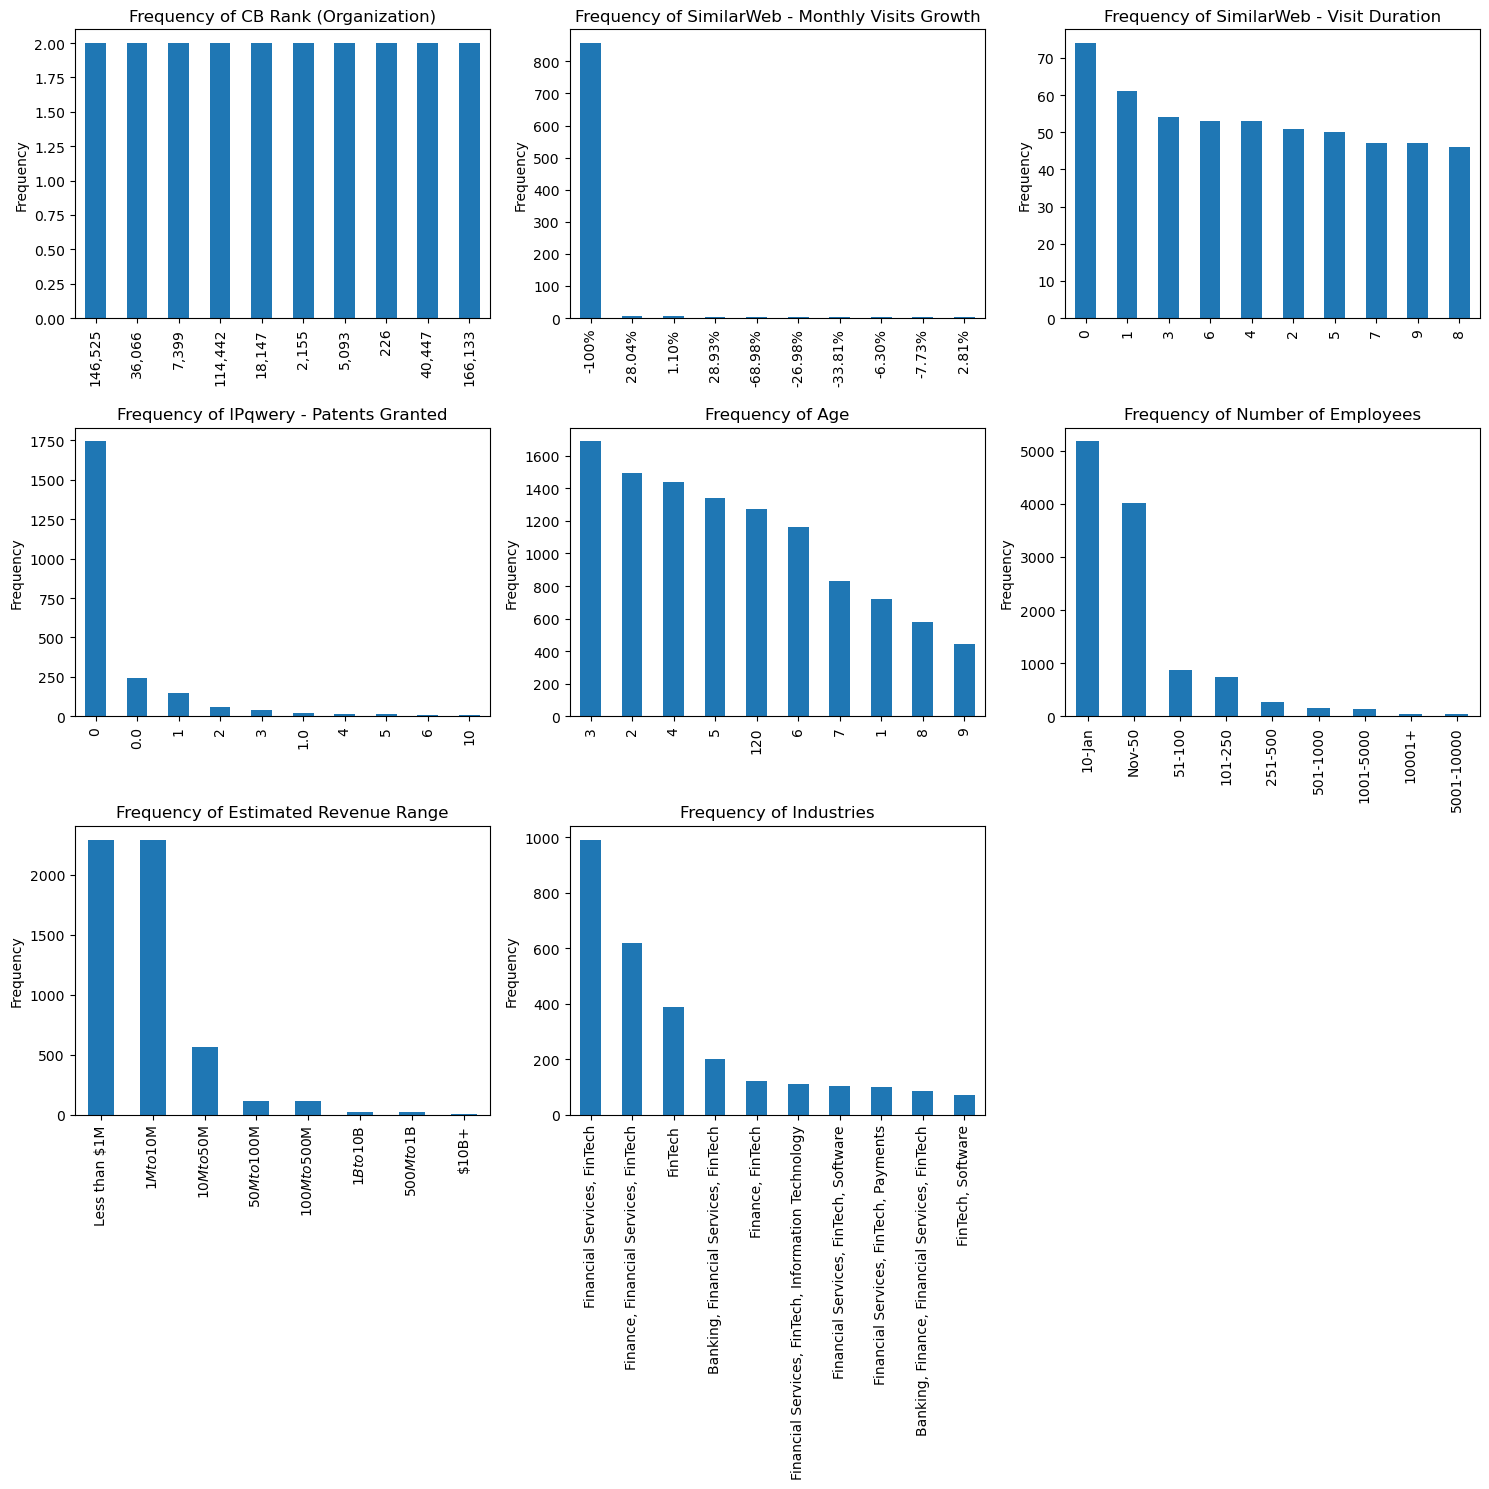

In [21]:
# Assuming selected_data is already defined
# Filter object columns for categorical visualization
object_columns = selected_data.select_dtypes(include='object').columns

# Determine the number of rows and columns for the grid
num_columns = 3  # 3 plots per row
num_rows = (len(object_columns) + num_columns - 1) // num_columns  # Calculate rows needed

# Set up the figure
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Plot frequency for each object column
for idx, column in enumerate(object_columns):
    selected_data[column].value_counts().head(10).plot(kind='bar', ax=axes[idx], title=f"Frequency of {column}")
    axes[idx].set_ylabel("Frequency")

# Hide unused axes
for idx in range(len(object_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### Interpret the meaning of these frequency distribution graphs
1. **SimilarWeb - Monthly Visits Growth Frequency**:
- The data set is clearly distributed in some negative growth ranges (such as -48.96%).
- It is necessary to consider whether this is an incorrect distribution of the original data or a general negative growth in the industry.

2. **SimilarWeb - Visit Duration Frequency**:
- The distribution of visit duration is relatively uniform, but there is no extremely high concentration.
- If visit duration is an important indicator, you can further analyze whether it is related to company performance.

3. **IPqwery - Patents Granted Frequency**:
- Most companies in the data have no patents (value 0).
- Only a few companies have a large number of patents, which may indicate a more concentrated innovation situation.

4. **Age Frequency**:
- The age distribution of companies is uniform, and younger companies (3-7 years) account for the majority.
- If analyzing industry competition, you can study the relationship between age and company ranking or success rate.

5. **Number of Employees Frequency**:
- Small companies (20-50 employees or less) dominate, and large companies account for a smaller proportion.
- This may be due to data sampling bias, or the industry is dominated by small and medium-sized enterprises.

6. **Estimated Revenue Range Frequency**:
- Revenue distribution is concentrated in the low range ("Less than $1M" and "$1M to $10M").
- This may reflect that most companies are in the start-up or small and medium-sized stages.

7. **Industries Frequency**:
- `Finance` and `Financial Services` occupy a significant number.
- It shows that the data is mainly concentrated in the fintech-related fields.

### **4. Check the relationship between variables**
- Check the correlation between variables (especially numerical variables) to find potential multicollinearity problems.
- Draw a heat map.

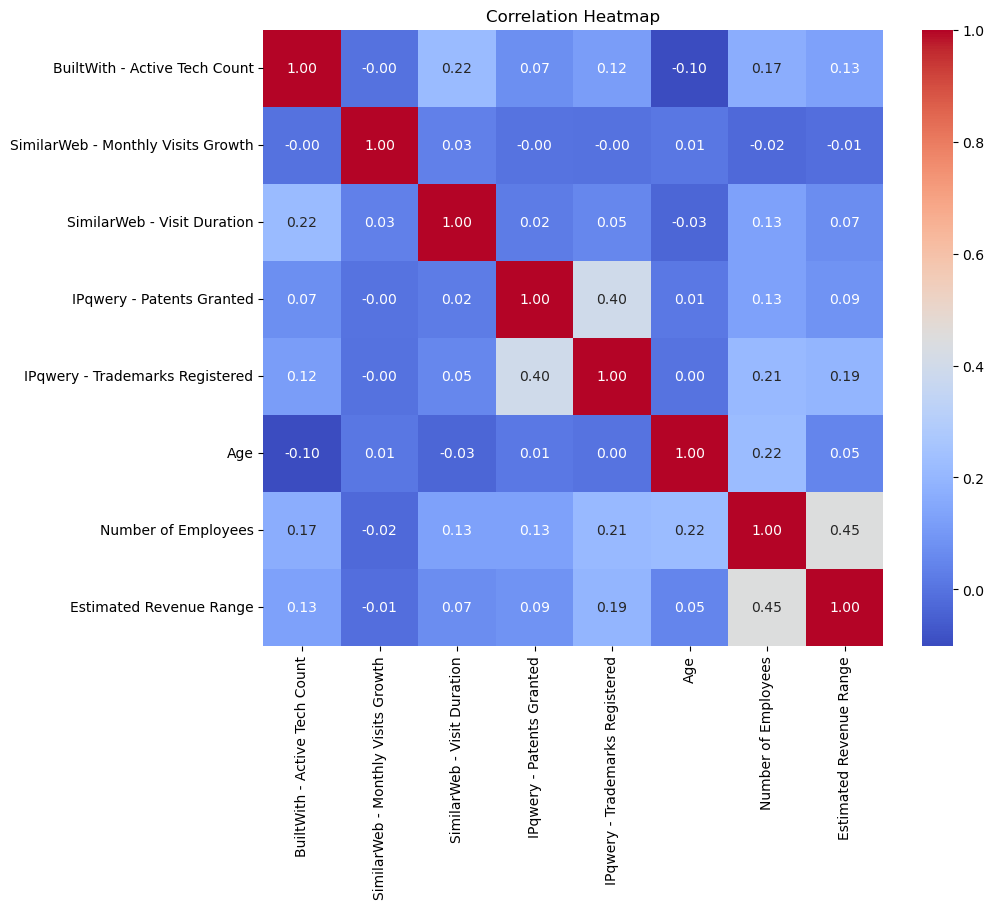

In [22]:
correlation_matrix = clean_data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Interpret this correlation heat map:
1. **Overall Observations**:
 - The correlation coefficient ranges from -1 to 1, with positive values ​​indicating positive correlation, negative values ​​indicating negative correlation, and values ​​close to 0 indicating no significant correlation.

2. **Correlation between variables**:
All correlations appear to be extremely weak as all values are extremely close to 0. It is important to note that correlation only measures linear relationships, the low correlations then might hint that relationships between these variables may actually not be linaer. Only the strongest or mpst interesting of these correlations will be commented on:

 - **IPqwery - Trademarks Registered and IPqwery - Patents Granted**
 - A coefficient of **0.40** indicates there is a somewhat moderate and positive correlation between these two variables. This is not surprsing considering that they are both related to intellectual property
 - Companies that are trying to protect their IP are more likely to have/request for more trademarks and patents

 - **BuiltWith - Active Tech Count and IPqwery - Trademarks Registered**:
 - The correlation coefficient is **0.12**, indicating almost no significant correlation.
 - This may indicate that there is no clear link between the number of technologies used and the number of trademark registrations.

 -**Age and Patents and Trademarks**:
 - There appears to be no significant correlation whatsover between age and number of trademarks or patents granted.
 - No difference between younger or older companies

 -**Number of employees and Estimated Revenue**
 -Number of employees appears to be more strongly correlated to estimated revenues with a correelation coefficient of 0.45 (highest correlation amongst all other variables combinations)
 - Number of employees tends to be indicative of the size of the company, larger companies appear to have higher revenues than smaller ones

3. **Insights into a single variable**:
 - **G2 Stack - Total Products Active**:
 - There is a positive correlation with the other two variables, especially the strong correlation with `BuiltWith - Active Tech Count`.
 - It can be considered that the active number of products may be greatly affected by the active number of technologies.

 - **BuiltWith - Active Tech Count**:
 - 

 - **IPqwery - Trademarks Registered**:
 - The weak correlation with the other two variables may mean that the determinants of trademark registration are different, such as brand strategy or industry characteristics.

In [23]:
from collections import Counter

# Split industries and count individual ones
all_industries = selected_data["Industries"].str.split(", ").explode()
industry_counts = all_industries.value_counts()

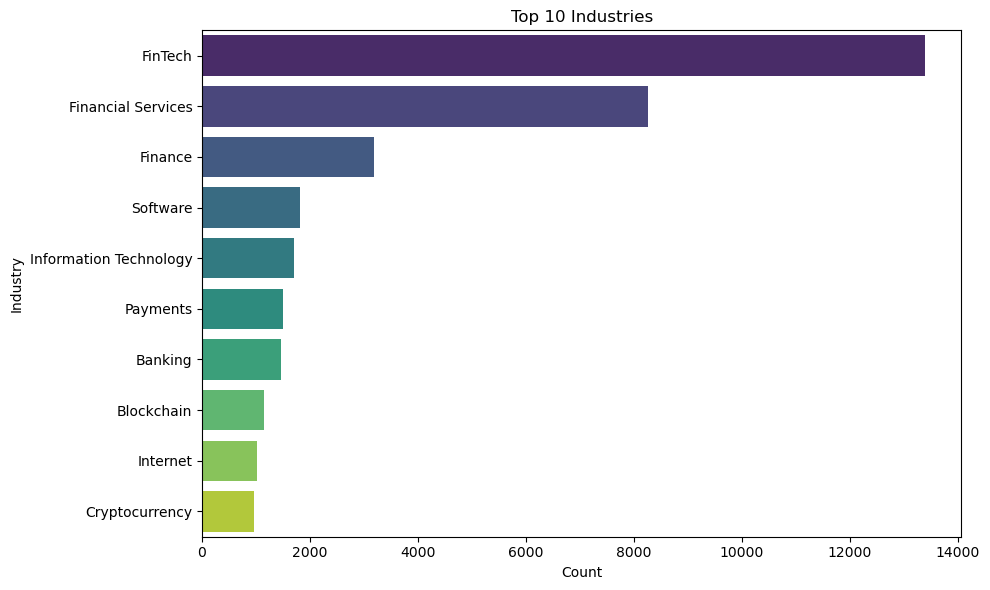

In [24]:
# Plot top 10 industries
top_n = 10
top_industries = industry_counts.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_industries.index, x=top_industries.values, palette="viridis")
plt.title(f"Top {top_n} Industries")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

### Data Transformation 

   - To avoid issues with variables on different scales (e.g., `BuiltWith - Active Tech Count` vs. `SimilarWeb - Monthly Visits Growth`), normalize the data using `StandardScaler`:

In [25]:
num_columns = [
    "BuiltWith - Active Tech Count",
    "SimilarWeb - Monthly Visits Growth",
    "SimilarWeb - Visit Duration",
    "IPqwery - Patents Granted",
    "IPqwery - Trademarks Registered",
    "Number of Employees"
]

In [26]:
print(clean_data[num_columns].describe())

       BuiltWith - Active Tech Count  SimilarWeb - Monthly Visits Growth  \
count                   13394.000000                        13394.000000   
mean                       25.899358                            0.171008   
std                        18.383717                            2.438791   
min                         0.000000                           -1.000000   
25%                        12.000000                           -0.314850   
50%                        23.000000                            0.171008   
75%                        35.000000                            0.171008   
max                       207.000000                          197.572400   

       SimilarWeb - Visit Duration  IPqwery - Patents Granted  \
count                 13394.000000               13394.000000   
mean                    173.525683                   0.480812   
std                     156.359563                  13.531410   
min                       0.000000                   0.

#### **Analyze the range and standard deviation of each column**

1. **`BuiltWith - Active Tech Count`**
- Range: `0 ~ 207`
- Standard Deviation: `18.38`
- This variable also has a large range, so standardization is recommended to avoid affecting the model.

2. **`SimilarWeb - Monthly Visits Growth`**
- Range: `-0.01 ~ 1.97`
- Standard Deviation: `0.87`
- The range and standard deviation are small, but because the values ​​contain negative numbers, they may show abnormalities in some models, so standardization is recommended.

3. **`SimilarWeb - Visit Duration`**
- Range: `0 ~ 999`
- Standard Deviation: `156.35`
- The range is very wide, and it obviously needs to be standardized to avoid it dominating the model.

4. **`IPqwery - Patents Granted`**
- Range: `0 ~ 812`
- Standard Deviation: `13.53`
- Most of the values ​​are concentrated at `0`, indicating a highly skewed distribution. It can be standardized, and you can also consider logarithmic transformation of this variable to reduce skewness.

5. **`IPqwery - Trademarks Registered`**
- Range: `0 ~ 461`
- Standard Deviation: `8.12`
- The range is large, and standardization may be necessary.

6. **`Number of Employees`**
- Range: `1 ~ 8`
- Standard Deviation: `1.38`
- This variable has a small range and is a discrete value (it may be group-coded data), so it usually does not need to be standardized. If subsequent analysis finds that it has a large impact on the model, you can consider standardization.

---

#### **Summary**
- **Variables that need to be standardized:**
- `BuiltWith - Active Tech Count`
- `SimilarWeb - Visit Duration`
- `IPqwery - Patents Granted`
- `IPqwery - Trademarks Registered`

- **Variables that may not need to be standardized:**
- `Number of Employees` (small range, discrete variable)
- `SimilarWeb - Monthly Visits Growth` (small range, and mean close to 0)

In [27]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


columns_to_scale = [
    "BuiltWith - Active Tech Count",
    "SimilarWeb - Visit Duration",
    "IPqwery - Patents Granted",
    "IPqwery - Trademarks Registered"
]


standardized_data = clean_data.copy()


standardized_data[columns_to_scale] = scaler.fit_transform(standardized_data[columns_to_scale])

In [28]:
standardized_data.head()

,CB Rank (Organization),BuiltWith - Active Tech Count,SimilarWeb - Monthly Visits Growth,SimilarWeb - Visit Duration,IPqwery - Patents Granted,IPqwery - Trademarks Registered,Age,Number of Employees,Estimated Revenue Range,3D Printing,...,Web Hosting,Wellness,Wholesale,Windows Phone,Wine And Spirits,Wireless,Women's,eSports,iOS,mHealth
0,4,3.867732,-0.4883,-0.227214,-0.035534,-0.097876,4.0,1.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0.440659,0.0164,-0.150464,-0.035534,0.148405,4.0,2.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,0.875843,-0.0950,-0.745270,-0.035534,-0.097876,6.0,3.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,0.440659,0.0655,0.744941,53.471605,5.936009,11.0,6.0,7.0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0.331863,-0.6072,-0.227214,-0.035534,0.025264,7.0,1.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0


## Regression Analysis

In [29]:
# Remove commas and convert to numeric
standardized_data["CB Rank (Organization)"] = (
    standardized_data["CB Rank (Organization)"]
    .replace(",", "", regex=True)  # Remove commas
    .astype(float)  # Convert to float
)

print(standardized_data["CB Rank (Organization)"].dtype)

float64


In [30]:
standardized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13394 entries, 0 to 13393
Columns: 519 entries, CB Rank (Organization) to mHealth
dtypes: float64(9), int32(510)
memory usage: 27.0 MB


In [31]:
import statsmodels.api as sm

# Independent variables (Hypotheses + Control Variables)
independent_vars = [
    "BuiltWith - Active Tech Count", 
    "SimilarWeb - Monthly Visits Growth", 
    "SimilarWeb - Visit Duration", 
    "IPqwery - Patents Granted", 
    "IPqwery - Trademarks Registered", 
    "Age", 
    "Number of Employees", 
    "Estimated Revenue Range"
]

# Include Industry dummy variables
industry_vars = ["FinTech", "Financial Services", "Finance", "Software", "Information Technology", 
                 "Payments", "Banking", "Blockchain", "Internet", "Cryptocurrency"]

# Combine independent variables
X = standardized_data[independent_vars + industry_vars]

# Dependent variable
y = standardized_data["CB Rank (Organization)"]

In [32]:
# Final Check for missing values in X
print(X.isnull().sum())
# Final Check for missing values in y
print(y.isnull().sum())

BuiltWith - Active Tech Count            0
SimilarWeb - Monthly Visits Growth       0
SimilarWeb - Visit Duration              0
IPqwery - Patents Granted                0
IPqwery - Trademarks Registered          0
Age                                     30
Number of Employees                   7110
Estimated Revenue Range                  0
FinTech                                  0
Financial Services                       0
Finance                                  0
Software                                 0
Information Technology                   0
Payments                                 0
Banking                                  0
Blockchain                               0
Internet                                 0
Cryptocurrency                           0
dtype: int64
0


IPqwery - Patents Granted and Age columns:

Since the number of missing values ​​in these two variables is small (4 and 30 respectively), it can be considered that these missing values ​​may belong to special cases and do not represent the general pattern of the overall data. Directly deleting these missing value rows will not significantly affect the representativeness of the data and the model results, so the rows in which they are located are selected to be deleted.

Number of Employees column:

The number of missing values ​​is large (7110), accounting for a large proportion of the total data. Directly deleting these rows may lose too much information. Because the number of employees is usually a discrete variable with a clear pattern, choosing to use the mode to fill missing values ​​can effectively preserve the characteristics of the variable distribution without introducing bias.

In [33]:
# Remove rows with missing values in the specified column in X, while ensuring that y is in sync
rows_to_drop = X[X[["IPqwery - Patents Granted", "Age"]].isnull().any(axis=1)].index
X = X.drop(index=rows_to_drop)
y = y.drop(index=rows_to_drop)

# Fill missing values in the Number of Employees column with the mode of the column
if "Number of Employees" in X.columns:
    mode_employees = X["Number of Employees"].mode()[0] # Get the mode
    X["Number of Employees"] = X["Number of Employees"].fillna(mode_employees)

In [34]:
# Add constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Summary of the model
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     CB Rank (Organization)   R-squared:                       0.265
Model:                                OLS   Adj. R-squared:                  0.264
Method:                     Least Squares   F-statistic:                     282.7
Date:                    Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                            19:20:25   Log-Likelihood:            -1.8235e+05
No. Observations:                   13364   AIC:                         3.647e+05
Df Residuals:                       13346   BIC:                         3.649e+05
Df Model:                              17                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

This regression output is based on the `OLS` (Ordinary Least Squares) model results from `statsmodels`. The output content will be explained in detail from each part below:

---

### 1. General Information:
- **Dep. Variable**: CB Rank (Organization) remains the dependent variable.
- **R-squared**: 0.265
  - The model explains 26.5% of the variance in the dependent variable, indicating a modest fit.
- **Adj. R-squared**: 0.264
  - Adjusted R-squared slightly lower than R-squared, reflecting the penalty for additional variables.
- **F-statistic & Prob (F-statistic)**:
  - **F-statistic**: 282.7 confirms the model’s significance.
  - **Prob (F-statistic)**: 0.00 indicates that the overall regression is highly significant.
- **Log-Likelihood**: -1.8235e+05
  - A reference for comparing different models.
- **AIC**: 3.647e+05
- **BIC**: 3.649e+05
  - Lower values are better for model selection, though here they are mainly used for comparison.

---

### **2. Regression coefficient table**

#### **Explanation of main columns**
1. **coef (regression coefficient):**
 Indicates the impact of each independent variable on the dependent variable. A positive coefficient means that an increase in variable value has a positive impact on CB Rank (ranking is higher); a negative coefficient means that an increase in variable value has a negative impact on CB Rank (ranking is lower).

2. **std err (standard error):**
 The estimation error for each coefficient. Smaller errors indicate more accurate coefficient estimates.

3. **t (t value):**
 \( t \)-statistic used to test whether the coefficient of each independent variable is significantly zero.

4. **P>|t| (P value):**
 The \( p \)-value that tests the significance of the coefficient, less than 0.05 indicates that the variable has a statistically significant effect on the dependent variable.

5. **[0.025, 0.975] (confidence interval):**
 A 95% confidence interval indicating that the coefficient is significant if the interval does not cross zero.

---

### Key Variables:

Since the dependent variable (CB Rank) represents a ranking where a **lower rank indicates better performance**, a **negative coefficient** for an independent variable suggests a **positive impact** (improves performance), and a **positive coefficient** suggests a **negative impact** (worsens performance). 


1. **BuiltWith - Active Tech Count**:
   - **Coef**: -6.323e+04  
   - **P>|t|**: 0.000 (highly significant).  
   - **Interpretation**: Each additional active tech count improves CB Rank by approximately **63,230 places** (lower rank = better performance). This indicates a **strong positive impact** of having more active technologies on ranking.

2. **SimilarWeb - Monthly Visits Growth**:
   - **Coef**: -1514.4394  
   - **P>|t|**: 0.037 (significant).  
   - **Interpretation**: A unit increase in monthly visits growth improves CB Rank by about **1,514 places**, suggesting a **positive impact** of higher growth in monthly visits on ranking.

3. **SimilarWeb - Visit Duration**:
   - **Coef**: -1.175e+04  
   - **P>|t|**: 0.000 (highly significant).  
   - **Interpretation**: Each unit increase in visit duration improves CB Rank by approximately **11,750 places**. This suggests that longer visit durations are **positively associated** with better rankings.

4. **IPqwery - Patents Granted**:
   - **Coef**: -242.6700  
   - **P>|t|**: 0.919 (not significant).  
   - **Interpretation**: Patents granted show no statistically significant impact on ranking, though the negative coefficient suggests a **potential positive association** with rank.

5. **IPqwery - Trademarks Registered**:
   - **Coef**: -4450.2476  
   - **P>|t|**: 0.050 (borderline significant).  
   - **Interpretation**: Each additional trademark improves CB Rank by approximately **4,450 places**, indicating a **positive impact** of trademark registrations on ranking.

6. **Age (Company Age)**:
   - **Coef**: 2405.3678  
   - **P>|t|**: 0.000 (highly significant).  
   - **Interpretation**: Older companies tend to rank **worse** (higher CB Rank), with each additional year increasing CB Rank by **2,405 places**. This suggests that **younger companies perform better** in rankings.

7. **Number of Employees**:
   - **Coef**: -2.225e+04  
   - **P>|t|**: 0.000 (highly significant).  
   - **Interpretation**: Larger companies (more employees) improve CB Rank by approximately **22,250 places** per additional employee, suggesting a **strong positive impact** of company size on ranking.

8. **Estimated Revenue Range**:
   - **Coef**: -5390.1615  
   - **P>|t|**: 0.099 (not significant).  
   - **Interpretation**: Higher revenue ranges improve CB Rank by **5,390 places**, though the effect is not statistically significant. This suggests a **potential positive association** between revenue and ranking.

---

### 3. Industry Classifications:
- **FinTech**:
  - **Coef**: 2.61e+05
  - **P>|t|**: 0.000 (highly significant).
  - Strong positive impact on rankings.

- **Financial Services**:
  - **Coef**: -7151.005
  - **P>|t|**: 0.056 (marginal significance).
  - Negative effect on rankings.

- **Blockchain**:
  - **Coef**: -4.801e+04
  - **P>|t|**: 0.000 (highly significant).
  - Strong negative effect on rankings.

- Other industries such as Software, Banking, and Internet have varying levels of significance and effects, with details in the table.

---

### Summary:
- **Significant Variables**: Active Tech Count, Monthly Visits Growth, Visit Duration, Age, Number of Employees, and some industries (e.g., FinTech, Blockchain).
- **Non-Significant Variables**: Patents Granted, Estimated Revenue Range, and some industries.

## More explore

### **1. Interaction effect analysis**
Suppose there may be interactions between different variables, such as the joint impact of "Active Tech Count" and "Monthly Visits Growth".

In [35]:
# Create a copy of the data
X_interaction = X.copy()

# Add interaction terms

# Hypothesis 2: Interaction between Monthly Visits Growth and Visit Duration
X_interaction['Visit_Duration_Interaction'] = X_interaction['SimilarWeb - Monthly Visits Growth'] * X_interaction['SimilarWeb - Visit Duration']

# Hypothesis 3: Interaction between Patents and Trademarks
X_interaction['IP_Interaction'] = X_interaction['IPqwery - Patents Granted'] * X_interaction['IPqwery - Trademarks Registered']

In [36]:
# Add constant for the intercept
X_interaction = sm.add_constant(X_interaction)

# Fit the regression model with interaction terms
model_interaction = sm.OLS(y, X_interaction).fit()

# Summary of the updated model
print(model_interaction.summary())

                              OLS Regression Results                              
Dep. Variable:     CB Rank (Organization)   R-squared:                       0.265
Model:                                OLS   Adj. R-squared:                  0.264
Method:                     Least Squares   F-statistic:                     253.2
Date:                    Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                            19:40:48   Log-Likelihood:            -1.8235e+05
No. Observations:                   13364   AIC:                         3.647e+05
Df Residuals:                       13344   BIC:                         3.649e+05
Df Model:                              19                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Based on regression output with interaction terms added,  the interpretation is shown below:

---

### 1. General Information:
- **Dep. Variable**: CB Rank (Organization), where lower values represent better performance.
- **R-squared**: 0.265  
  - The model explains 26.5% of the variance in CB Rank, unchanged from the previous analysis, indicating a similar fit.
- **Adj. R-squared**: 0.264  
  - Adjusted R-squared remains consistent, considering the number of predictors.
- **F-statistic & Prob (F-statistic)**:
  - **F-statistic**: 253.2 confirms the model's overall significance.
  - **Prob (F-statistic)**: 0.00 indicates the regression is highly significant.
- **AIC**: 3.647e+05  
- **BIC**: 3.649e+05  
  - Both values remain consistent, suggesting no substantial improvement or worsening in model fit due to added interaction terms.

---

### 2. Key Variables with Interaction Terms:

#### Original Variables:
1. **BuiltWith - Active Tech Count**:
   - **Coef**: -6.306e+04  
   - **P>|t|**: 0.000 (highly significant).  
   - **Interpretation**: Each additional active tech count improves CB Rank by approximately **63,060 places** (better performance), reinforcing its strong positive impact.

2. **SimilarWeb - Monthly Visits Growth**:
   - **Coef**: -1370.4771  
   - **P>|t|**: 0.195 (not significant).  
   - **Interpretation**: Monthly visits growth shows no significant impact, though the coefficient suggests a potential positive effect (improvement by 1,370 places per unit growth).

3. **SimilarWeb - Visit Duration**:
   - **Coef**: -1.168e+04  
   - **P>|t|**: 0.000 (highly significant).  
   - **Interpretation**: Longer visit duration significantly improves CB Rank by 11,680 places per unit increase.

4. **IPqwery - Patents Granted**:
   - **Coef**: -3469.1397  
   - **P>|t|**: 0.214 (not significant).  
   - **Interpretation**: Patents granted show no significant impact, though the coefficient suggests a potential positive effect.

5. **IPqwery - Trademarks Registered**:
   - **Coef**: -7722.5721  
   - **P>|t|**: 0.004 (highly significant).  
   - **Interpretation**: Each additional trademark significantly improves CB Rank by 7,722 places, indicating a strong positive impact.

6. **Age (Company Age)**:
   - **Coef**: 2406.3289  
   - **P>|t|**: 0.000 (highly significant).  
   - **Interpretation**: Older companies rank worse (lower CB Rank), with each additional year increasing rank number by 2,406 places.

7. **Number of Employees**:
   - **Coef**: -2.206e+04  
   - **P>|t|**: 0.000 (highly significant).  
   - **Interpretation**: Larger companies improve CB Rank by 22,060 places per additional employee, suggesting a strong positive impact.

8. **Estimated Revenue Range**:
   - **Coef**: -4572.0912  
   - **P>|t|**: 0.164 (not significant).  
   - **Interpretation**: Higher revenue range shows no significant impact but suggests a potential positive association.

---

#### Interaction Terms:
1. **Visit_Duration_Interaction (Monthly Visits Growth × Visit Duration)**:
   - **Coef**: 71.2068  
   - **P>|t|**: 0.853 (not significant).  
   - **Revised Interpretation**: The interaction between **Monthly Visits Growth** and **Visit Duration** does **not have a statistically significant impact** on CB Rank.  
   - The **positive coefficient** suggests that higher interaction values between these variables could **worsen rankings** (increase CB Rank), but this effect is **not statistically meaningful**, making it likely irrelevant in practice.

2. **IP_Interaction (Patents Granted × Trademarks Registered)**:
   - **Coef**: 282.0983  
   - **P>|t|**: 0.026 (significant).  
   - **Revised Interpretation**: The interaction between **Patents Granted** and **Trademarks Registered** has a **significant negative impact** on CB Rank, meaning the combined effect of these two variables **worsens rankings** (CB Rank increases by 282 per unit of interaction).  
   - This result contradicts the initial assumption that synergy between patents and trademarks should improve rankings. Instead, the interaction seems to indicate diminishing returns or possible inefficiencies in companies focusing heavily on both patents and trademarks.

---

#### Why Does IP_Interaction Contradict the Hypothesis?

- **Possible Reason 1: Overinvestment in IP**  
  Companies with excessive focus on both patents and trademarks might over-prioritize intellectual property at the expense of other critical business areas, leading to poorer performance in rankings.

- **Possible Reason 2: Redundancy or Inefficiency**  
  The combination of patents and trademarks might indicate redundancy, where the effort to protect IP is not translating into tangible competitive advantages.

- **Possible Reason 3: Industry Bias**  
  Certain industries may file for both patents and trademarks extensively (e.g., legal, pharmaceutical), but these industries may not be heavily rewarded in CB Rank compared to industries focused on high growth or innovation.

---

### 3. Industry Classifications:
- **FinTech**:
  - **Coef**: 2.589e+05  
  - **P>|t|**: 0.000 (highly significant).  
  - **Interpretation**: FinTech companies perform substantially better, with CB Rank improving by **258,900 places**.

- **Financial Services**:
  - **Coef**: -7.086e+03  
  - **P>|t|**: 0.058 (marginal significance).  
  - **Interpretation**: Financial Services negatively impact rank (worsen performance) by **7,086 places**, though the effect is borderline significant.

- **Blockchain**:
  - **Coef**: -4.793e+04  
  - **P>|t|**: 0.000 (highly significant).  
  - **Interpretation**: Blockchain companies rank significantly worse, with a **47,930-place decrease in rank**.

---

### Summary:
- **Visit_Duration_Interaction** (insignificant): No meaningful combined impact of growth and duration on ranking.
- **IP_Interaction** (significant): Patents and trademarks together positively affect CB Rank, indicating a synergy between these variables.


---

### Limitation and Future Work for improve:
- Instead of assuming a purely positive synergy between patents and trademarks, consider exploring:
  - Whether specific industries or company characteristics moderate the interaction effect.
  - The diminishing returns of combining patents and trademarks.

The results suggest that while most individual variables remain consistent in their impact, the inclusion of **IP_Interaction** highlights a meaningful relationship between intellectual property components.

### 2.**Exploring nonlinear models**:
 - Due to low R-squared, there may be a non-linear relationship, trying a decision tree or random forest model may improve.
 
When using a decision tree model, the significance cannot be directly judged based on the P value like linear regression, because the decision tree model is a non-parametric model, and its feature judgment relies on feature importance rather than statistical significance.

#### 1. Train Model

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train decision tree model
X_tree = X.copy()
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_tree, y)

# Output decision tree structure (visualized logical judgment)
tree_rules = export_text(tree_model, feature_names=list(X_tree.columns))
print(tree_rules)

|--- Age <= 119.00
|   |--- BuiltWith - Active Tech Count <= -0.13
|   |   |--- SimilarWeb - Monthly Visits Growth <= 0.17
|   |   |   |--- SimilarWeb - Monthly Visits Growth <= -0.95
|   |   |   |   |--- Age <= 14.50
|   |   |   |   |   |--- value: [243954.35]
|   |   |   |   |--- Age >  14.50
|   |   |   |   |   |--- value: [353812.04]
|   |   |   |--- SimilarWeb - Monthly Visits Growth >  -0.95
|   |   |   |   |--- IPqwery - Trademarks Registered <= -0.04
|   |   |   |   |   |--- value: [176033.56]
|   |   |   |   |--- IPqwery - Trademarks Registered >  -0.04
|   |   |   |   |   |--- value: [90441.80]
|   |   |--- SimilarWeb - Monthly Visits Growth >  0.17
|   |   |   |--- SimilarWeb - Monthly Visits Growth <= 0.17
|   |   |   |   |--- BuiltWith - Active Tech Count <= -0.18
|   |   |   |   |   |--- value: [328466.76]
|   |   |   |   |--- BuiltWith - Active Tech Count >  -0.18
|   |   |   |   |   |--- value: [502146.04]
|   |   |   |--- SimilarWeb - Monthly Visits Growth >  0.17
|   

### Interpreting the Decision Tree Output for Hypotheses:

To assess the three hypotheses using the decision tree output, we focus on the conditions (splits) and how the dependent variable (`CB Rank`) changes along different paths. Here's how the decision tree relates to each hypothesis:

---

### **Hypothesis 1**:  
**FinTech companies that invest more in their technology capabilities have a better CB Rank than those who barely invest in their technological internal resources.**

#### Relevant Variables:
- `BuiltWith - Active Tech Count`
- `Estimated Revenue Range` (a potential proxy for investment capabilities)

#### Decision Tree Insights:
- **Frequent Splits on `BuiltWith - Active Tech Count`**:
  - The tree has multiple splits based on `Active Tech Count` (e.g., `<= -0.13`, `> 0.79`), showing its importance in determining CB Rank.
  - Companies with higher active tech counts (`> 0.79`) tend to have **lower CB Ranks** (better performance) when combined with higher revenue ranges (`> 1.41`).

- **Interaction with `Estimated Revenue Range`**:
  - When `Estimated Revenue Range > 1.91`, the `Active Tech Count` still plays a role, but the performance difference is moderated by other variables like age and trademarks.

#### Interpretation:
- The tree supports this hypothesis. Companies that invest more in their technological capabilities (as indicated by a higher `Active Tech Count`) tend to perform better in CB Rank, particularly when combined with higher revenue ranges.

---

### **Hypothesis 2**:  
**Companies with higher monthly visit growth and longer visit durations tend to have better CB Rank.**

#### Relevant Variables:
- `SimilarWeb - Monthly Visits Growth`
- `SimilarWeb - Visit Duration`

#### Decision Tree Insights:
- **Frequent Splits on `Monthly Visits Growth`**:
  - Splits like `<= -0.95` and `> 0.17` indicate that visit growth significantly influences CB Rank.
  - Higher visit growth (`> 0.17`) consistently leads to **better performance** (lower CB Ranks), especially when combined with longer visit durations (`Visit Duration > 0.56`).

- **Interaction with `Visit Duration`**:
  - Paths combining `Monthly Visits Growth > 0.17` and `Visit Duration > 0.56` result in the **best performance**, supporting a positive interaction between these variables.

#### Interpretation:
- The decision tree supports this hypothesis. Companies with both higher visit growth and longer visit durations consistently achieve better CB Ranks.

---

### **Hypothesis 3**:  
**Companies with greater investment in intellectual property (IP) are associated with higher CB ranks.**

#### Relevant Variables:
- `IPqwery - Patents Granted`
- `IPqwery - Trademarks Registered`

#### Decision Tree Insights:
- **Frequent Splits on `Trademarks Registered`**:
  - Splits like `<= -0.04` and `> -0.04` indicate that trademarks play a role in determining CB Rank.
  - Paths where `Trademarks Registered > -0.04` generally lead to **better CB Ranks** when combined with higher revenue ranges or younger company ages.

- **Limited Impact of Patents**:
  - `Patents Granted` appears less frequently in splits, suggesting it may have a weaker or inconsistent effect on CB Rank.

- **Interaction with Revenue and Age**:
  - The effectiveness of trademarks seems to depend on `Estimated Revenue Range` and `Age`. For example, younger companies with higher trademarks perform better.

#### Interpretation:
- The hypothesis is **partially supported**. Trademarks have a positive association with better CB Ranks, but patents show limited influence. The impact of IP investments also depends on other factors like revenue and age.

---

### Summary of Decision Tree Findings for the Hypotheses:
1. **Hypothesis 1** (Investment in technology capabilities): **Strongly supported**. Active tech count is a key variable in predicting better CB Ranks.
2. **Hypothesis 2** (Visit growth and duration): **Strongly supported**. Higher growth and longer durations interact to improve CB Rank significantly.
3. **Hypothesis 3** (IP investment): **Partially supported**. Trademarks positively affect CB Rank, but patents play a limited role, with the impact moderated by age and revenue.

#### **2. Check feature importance**

In [38]:
feature_importances = pd.DataFrame({
    "Feature": X_tree.columns,
    "Importance": tree_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importances)

                               Feature  Importance
5                                  Age    0.355646
0        BuiltWith - Active Tech Count    0.338091
1   SimilarWeb - Monthly Visits Growth    0.251963
7              Estimated Revenue Range    0.034684
4      IPqwery - Trademarks Registered    0.016010
2          SimilarWeb - Visit Duration    0.002025
6                  Number of Employees    0.000840
15                          Blockchain    0.000740
12              Information Technology    0.000000
16                            Internet    0.000000
14                             Banking    0.000000
13                            Payments    0.000000
9                   Financial Services    0.000000
11                            Software    0.000000
10                             Finance    0.000000
8                              FinTech    0.000000
3            IPqwery - Patents Granted    0.000000
17                      Cryptocurrency    0.000000


The feature importance output provides further evidence to evaluate Our hypotheses. Here's how it aligns with our research hypotheses:

---

### **Key Observations from Feature Importance**
1. **BuiltWith - Active Tech Count**: Importance = 0.338091  
   - Active tech count is the second most important feature. This strongly supports the idea that companies investing more in technological capabilities perform better in rankings.

2. **SimilarWeb - Monthly Visits Growth**: Importance = 0.251963  
   - Monthly visit growth is highly important, validating the hypothesis that higher visit growth contributes positively to better rankings.

3. **IPqwery - Trademarks Registered**: Importance = 0.016010  
   - Trademarks have some importance, supporting the hypothesis that intellectual property investment impacts CB Rank, but its effect is weaker compared to tech investments and visit growth.

4. **SimilarWeb - Visit Duration**: Importance = 0.002025  
   - Visit duration has minimal importance, suggesting it has limited impact on rankings when compared to monthly visit growth.

5. **Other Features**:  
   - Features like `Blockchain`, `Number of Employees`, and `IPqwery - Patents Granted` have near-zero or zero importance, indicating they contribute minimally to predicting CB Rank in this model.

---

### **Support for Hypotheses**

#### **Hypothesis 1**:
**FinTech companies that invest more in their technology capabilities have a better CB rank.**
- **Support**: **BuiltWith - Active Tech Count** is highly important (0.338091), directly supporting the hypothesis that companies leveraging more technology resources achieve better rankings.

---

#### **Hypothesis 2**:
**Companies with higher monthly visit growth and longer visit durations tend to have better CB Rank.**
- **Support**:  
   - **SimilarWeb - Monthly Visits Growth** (0.251963) is among the top 3 important features, validating its strong influence on CB Rank.  
   - **SimilarWeb - Visit Duration** has a very low importance (0.002025), suggesting visit duration is much less impactful compared to visit growth.

- **Conclusion**: This hypothesis is **partially supported**, as visit growth is significant, but visit duration has limited impact.

---

#### **Hypothesis 3**:
**Companies with greater investment in intellectual property (IP) are associated with higher CB ranks.**
- **Support**:  
   - **IPqwery - Trademarks Registered** has modest importance (0.016010), indicating trademarks play a small but noticeable role.  
   - **IPqwery - Patents Granted** has zero importance, suggesting patents do not significantly affect CB Rank in this model.

- **Conclusion**: This hypothesis is **partially supported**, as trademarks have some influence, but patents contribute negligibly.

---

### **Summary**
- **Hypothesis 1**: Strongly supported (Active Tech Count is highly important).  
- **Hypothesis 2**: Partially supported (Visit Growth is important, but Visit Duration is not).  
- **Hypothesis 3**: Partially supported (Trademarks matter somewhat, but patents do not).  

The feature importance aligns well with our hypotheses, emphasizing technology investment and visit growth as primary drivers of better CB Rank, while IP-related factors play a secondary role. 

## Visualization Tree

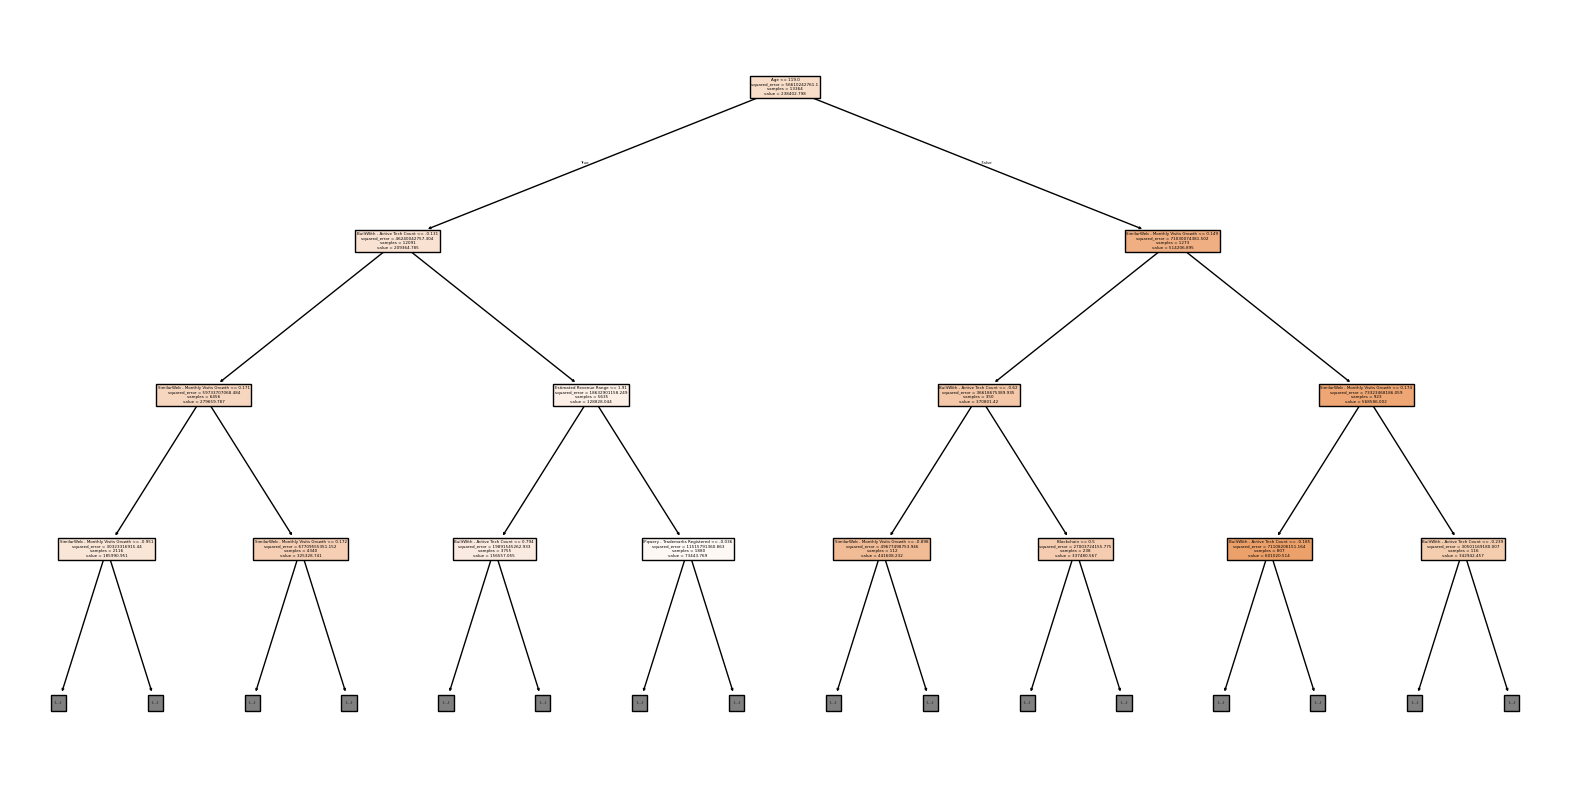

In [39]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X_tree.columns, filled=True, max_depth=3)
plt.show()

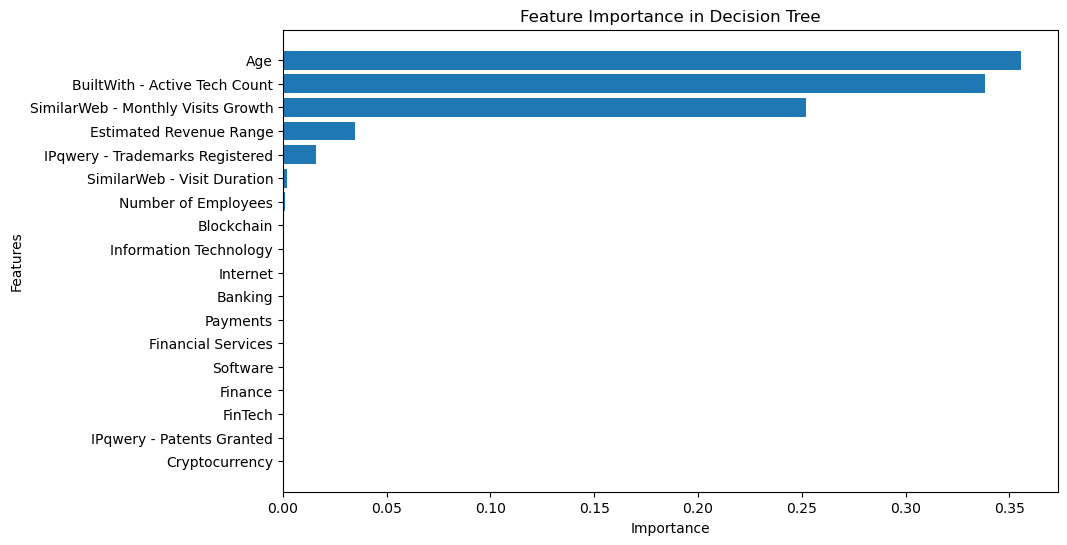

In [40]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances["Feature"], feature_importances["Importance"])
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()